# Kmeans Practical Exercise
In this exercise, we will use k-means clustering algorithm on [mall customer unlabeled data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) to create groups of the customer based on annual spending and spending score assigned by the mall.
We are going to use sklearns library for it.

## Import The Library
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* KMeans: Sklearn library for K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load Data
* We are going to use ‘Mall_Customers.csv’ CSV file, you can find in the current folder
* Dataset contains 5 columns CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
df = pd.read_csv('./Mall_Customers.csv')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Understanding The Data
* There are total 200 training example without any label to indicate which customer belong which group
* We are going to use annual income and spending score to find the clusters in data. Note that spending score is from 1 to 100 which is assigned by the mall based on customer behavior and spending nature 

### Plot the data points using the Annual Income (k$) and Spending Score (1-100)

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

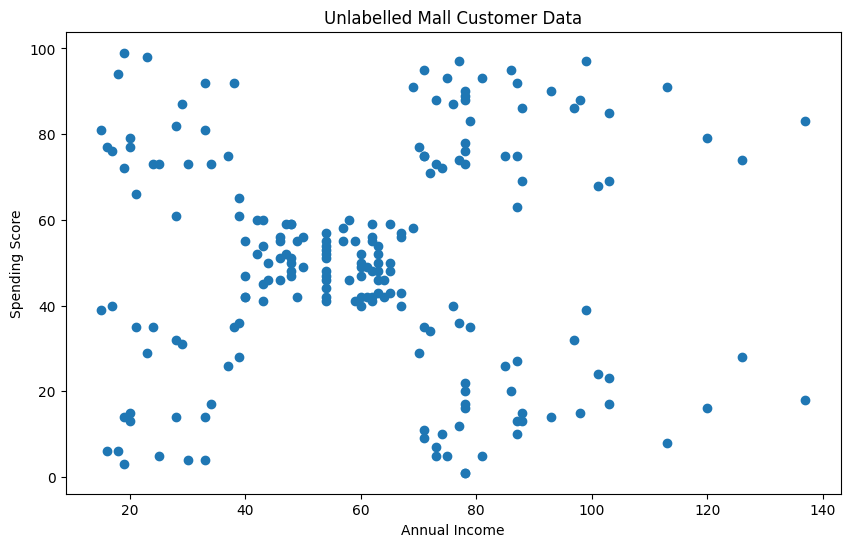

In [4]:
plt.figure(figsize=(10,6))

# Use a scatter plot for the specified columns to obtain the figure below
#Write your code here
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')


### Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use

In [21]:
'''
# Create an array named X and print the first five records of the annual income and spending score columns
** Write your code here
**
'''
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Choosing The Number of Clusters
By visual inspection of above scatter plot, we can identify 5 possible clusters. But since there is no other information available its very difficult say it with 100% confidence. So lets try to verify this with Elbow method technique.

### Elbow Method
* Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
* We will use 'random' initialization method for this study.
* Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

### Continue the below code to perform KMeans for different numbers of clusters to obtain the figure below representing the elbow method

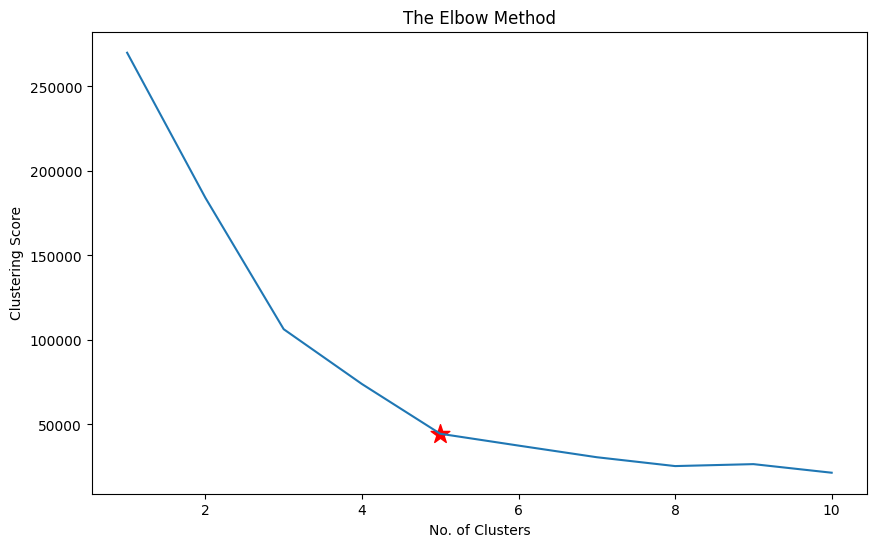

In [23]:
clustering_score = []
for i in range(1, 11):
   
    '''
    # First create an instance of the KMeans class
    # Fit the data to X
    # add the inertia_ (Sum of squared distances of samples to their closest cluster center.) of this cluster to the clustering_score list
    
    ** Write your code here
    **
    **
    '''
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

From above elbow plot its clear that clustering scores slows down after 5 number of clusters. So we can use K= 5 for further analysis.

## Compute K-Means Clustering <a id ="16"></a>
Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [ ]:
### Perform KMeans clustering with 5 clusters



In [33]:
'''
# Perform kmeans with five clusters
# Fit the data to X
# predict the cluster index for each sample
# print the predicted values

** Write your code here
**
**
**
'''
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
pred = kmeans.predict(X)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

### 'pred' contains the values index( 0 to 4) cluster for every training example. Let's add it to original dataset for better understanding.

In [34]:
'''
# Add the predicted cluster indices as a new column in the df dataframe named 'Cluster'
# Print Number of data points in each cluster
# Display the updated dataframe

** Write your code here
**
**
'''
df['Cluster'] = pred
print(df['Cluster'].value_counts())

Cluster
0    81
3    39
1    35
4    23
2    22
Name: count, dtype: int64


## Visualization
Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.

Text(0.5, 1.0, 'Customer Clusters')

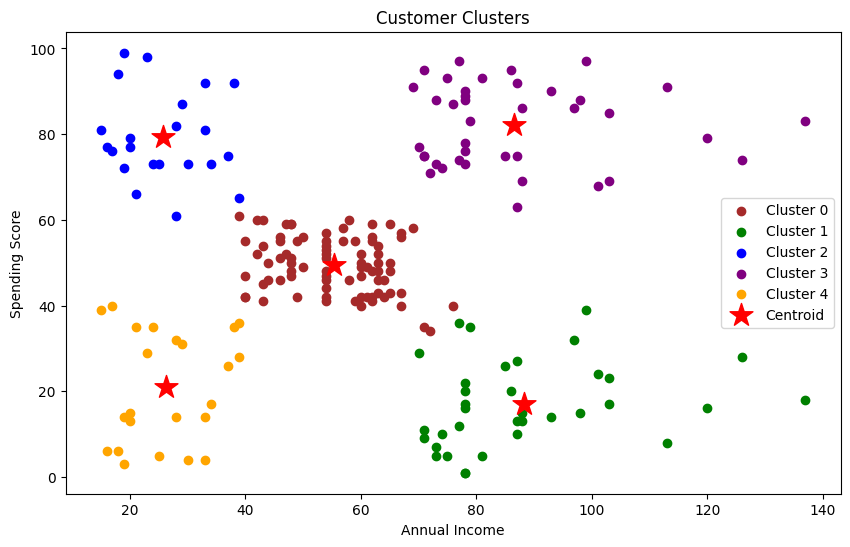

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

## Visualizing the inner working of Kmeans

# Inner Working: GIF <a id ="19"></a>

Isn't a GIF makes a K-Means clustering visualization even more satisfying!


![K_means_Clustering](https://raw.githubusercontent.com/satishgunjal/images/master/K_means_Clustering.gif)